<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# MINERÍA DE DATOS
## Nombre: Joey Jerez Sepúlveda
## Docente: Jorge Alberto Castro
## Sección: BIY7121-001D

# FASE 1 : COMPRENDER EL NEGOCIO

# 1.1 Contexto del negocio

StarCraft II es un juego de estrategia en tiempo real (RTS) desarrollado por Blizzard Entertainment. Lanzado en 2010, es la secuela
del icónico StarCraft original. El juego se ambienta en un futuro distante, donde tres facciones, los humanos terran, los enjambres
zerg y los misteriosos protoss, luchan por el control del sector Koprulu.
Los jugadores pueden elegir una de las tres razas, cada una con habilidades únicas y estrategias distintas. StarCraft II presenta una
campaña envolvente con una narrativa rica y desafiantes misiones para cada raza. Además, destaca en el ámbito multijugador,
donde jugadores de todo el mundo compiten en emocionantes batallas.
El juego ha alcanzado un estatus destacado en los deportes electrónicos (eSports), con una comunidad activa y competiciones de
alto nivel. La gestión de recursos, la toma de decisiones estratégicas y la velocidad de ejecución son fundamentales en StarCraft II,
lo que lo convierte en un desafío constante. Con gráficos impresionantes, una jugabilidad sólida y una escena competitiva vibrante,
StarCraft II sigue siendo una referencia en el mundo de los juegos de estrategia en tiempo real.

En este contexto, se presentan los siguientes datos:

* GameID: Unique ID for each game
* LeagueIndex: 1-8 for Bronze, Silver, Gold, Diamond, Master, GrandMaster, Professional leagues
* Age: Age of each player
* HoursPerWeek: Hours spent playing per week
* TotalHours: Total hours spent playing
* APM: Action per minute
* SelectByHotkeys: Number of unit selections made using hotkeys per timestamp
* AssignToHotkeys: Number of units assigned to hotkeys per timestamp
* MinimapAttacks: Number of attack actions on minimal per timestamp
* MinimapRightClicks: Number of right-clicks on minimal per timestamp
* NumberOfPACs: Number of PACs per timestamp
* GapBetweenPACs: Mean duration between PACs (milliseconds)
* ActionLatency: Mean latency from the onset of PACs to their first action (milliseconds)
* ActionsInPAC: Mean number of actions within each PAC
* TotalMapExplored: Number of 24x24 game coordinate grids viewed by player per timestamp
* WorkersMade: Number of SCVs, drones, probes trained per timestamp
* UniqueUnitsMade: Unique units made per timestamp
* ComplexUnitsMade: Number of ghosts, investors, and high templars trained per timestamp
* ComplexAbilityUsed: Abilities requiring specific targeting instructions used per timestamp
* MaxTimeStamp: Time stamp of game's last recorded event
s datos: 


# 1.2 Objetivos del análisis

El objetivo principal de este estudio es identificar patrones en los datos que permitan entender qué factores determinan el éxito de un jugador en StarCraft II. Para ello, se plantean los siguientes objetivos específicos:

1️⃣ Evaluar el impacto del APM en el rendimiento del jugador.

* Hipótesis: Un mayor número de acciones por minuto (APM) está positivamente correlacionado con una clasificación más alta en la liga (LeagueIndex).
* Justificación: En StarCraft II, la velocidad de ejecución es un factor clave en la toma de decisiones y la eficiencia en el juego.


2️⃣ Analizar la relación entre el tiempo jugado y el nivel competitivo.

* Hipótesis: Los jugadores con mayor tiempo acumulado en el juego (TotalHours) tienden a estar en ligas más altas.
* Justificación: La experiencia en juegos de estrategia suele estar relacionada con un mejor desempeño, ya que los jugadores aprenden tácticas avanzadas y optimizan su toma de decisiones.


3️⃣ Explorar la importancia del uso del minimapa en el juego.

* Hipótesis: Un mayor uso del minimapa para ataques y movimientos (MinimapAttacks) está asociado con un mejor rendimiento en el juego.
* Justificación: La información es clave en StarCraft II. Un jugador que utiliza el minimapa para gestionar unidades y ataques puede reaccionar más rápido a los movimientos del rival y mejorar su estrategia general.

# 1.3 KPIs Relevantes

Para analizar estos objetivos, se utilizarán los siguientes indicadores clave de desempeño (KPIs):

* Objetivo 1: Evaluar el impacto del APM en el rendimiento 

KPI 1.1: Coeficiente de correlación entre APM y LeagueIndex : mide si a mayor APM, hay mayor nivel competitivo.

KPI 1.2: F1-score del modelo que predice LeagueIndex usando APM : mide si APM es un buen predictor individual del rendimiento.
* Objetivo 2: Analizar la relación entre experiencia y nivel competitivo

KPI 2.1: Correlación entre log(TotalHours) y LeagueIndex : se espera que jugadores con más experiencia estén en ligas altas.

KPI 2.2: Distribución promedio de LeagueIndex por cuartiles de TotalHours: permite ver si hay una tendencia ascendente real.
* Objetivo 3: Evaluar el uso del minimapa como indicador estratégico

KPI 3.1: Correlación entre MinimapAttacks y LeagueIndex.
KPI 3.2: F1-score del modelo que incluye MinimapAttacks como predictor.

Se espera que jugadores más avanzados usen más el minimapa.




Estos KPIs permitirán evaluar las hipótesis planteadas y proporcionar insights sobre los factores determinantes del rendimiento en StarCraft II.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración de estilo para gráficos
sns.set(style="whitegrid")

In [3]:
# Cargar el dataset (ajusta el nombre del archivo si es necesario)
df = pd.read_csv("starcraft_duoc(1).csv", delimiter=";", thousands='.')

# FASE 2 : COMPRENDER LOS DATOS

Primeramente, se procede a realizar una exploración general de los datos para entender como está formado el dataset y entender como abordar las variables del caso.

# Carga y exploración de datos:
Visualización de las primeras filas, tipos de datos y descripción general.

In [4]:
#Se muestran los primeros datos del Dataset con sus columnas
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143718,0.003515159,0.000219697,0.000109849,0.000392317,4849036,326677,408673,47508,219697.0,0.0013966,4.71e-05,0,0,127448
1,55,5,23.0,10.0,5000.0,1292322,0.003303812,0.000259462,0.000294057,0.000432436,4307064,329194,423454,48434,380544.0,0.0011935,8.65e-05,0,0.00020757,57812
2,56,4,30.0,10.0,200.0,699612,0.001101091,0.00033557,0.000293624,0.000461409,2925755,446475,753548,4043,230705.0,0.00074455,6.29e-05,0,0.00018876,95360
3,57,3,19.0,20.0,400.0,1076016,0.001033542,0.000213101,5.33e-05,0.000543409,3782551,292203,537352,49155,202446.0,0.0004262,7.46e-05,0,0.00038358,93852
4,58,3,32.0,10.0,500.0,1228908,0.001136014,0.000327326,0,0.001328558,2368299,226885,620813,9374,288817.0,0.0011745,7.7e-05,0,1.93e-05,51936


In [5]:
#Se muestra la cantidad de datos y columnas del Dataset
df.shape

(3395, 20)

In [6]:
# Revisión de los tipos de datos
df.dtypes

GameID                  int64
LeagueIndex             int64
Age                   float64
HoursPerWeek          float64
TotalHours            float64
APM                     int64
SelectByHotkeys        object
AssignToHotkeys        object
MinimapAttacks         object
MinimapRightClicks     object
NumberOfPACs            int64
GapBetweenPACs          int64
ActionLatency           int64
ActionsInPAC            int64
TotalMapExplored      float64
WorkersMade            object
UniqueUnitsMade        object
ComplexUnitsMade       object
ComplexAbilityUsed     object
MaxTimeStamp            int64
dtype: object

In [7]:
# Información general del dataset
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              3395 non-null   int64  
 1   LeagueIndex         3395 non-null   int64  
 2   Age                 3340 non-null   float64
 3   HoursPerWeek        3339 non-null   float64
 4   TotalHours          3338 non-null   float64
 5   APM                 3395 non-null   int64  
 6   SelectByHotkeys     3395 non-null   object 
 7   AssignToHotkeys     3395 non-null   object 
 8   MinimapAttacks      3395 non-null   object 
 9   MinimapRightClicks  3395 non-null   object 
 10  NumberOfPACs        3395 non-null   int64  
 11  GapBetweenPACs      3395 non-null   int64  
 12  ActionLatency       3395 non-null   int64  
 13  ActionsInPAC        3395 non-null   int64  
 14  TotalMapExplored    3395 non-null   float64
 15  WorkersMade         3395 non-

# Estadísticas descriptivas:
Media, mediana, desviación estándar, valores mínimos y máximos.

In [8]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
print(df.describe())


Resumen estadístico:
             GameID  LeagueIndex          Age  HoursPerWeek      TotalHours  \
count   3395.000000  3395.000000  3340.000000   3339.000000     3338.000000   
mean    4805.012371     4.184094    21.647904     15.910752      960.421809   
std     2719.944851     1.517327     4.206341     11.962912    17318.133922   
min       52.000000     1.000000    16.000000      0.000000        3.000000   
25%     2464.500000     3.000000    19.000000      8.000000      300.000000   
50%     4874.000000     4.000000    21.000000     12.000000      500.000000   
75%     7108.500000     5.000000    24.000000     20.000000      800.000000   
max    10095.000000     8.000000    44.000000    168.000000  1000000.000000   

                APM  NumberOfPACs  GapBetweenPACs  ActionLatency  \
count  3.395000e+03  3.395000e+03    3.395000e+03   3.395000e+03   
mean   9.617322e+05  3.153105e+06    3.576449e+05   5.644373e+05   
std    6.480166e+05  1.344491e+06    2.019363e+05   2.631100e+

In [9]:
# Identificar valores nulos
total_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(total_nulos[total_nulos > 0])


Valores nulos por columna:
Age             55
HoursPerWeek    56
TotalHours      57
dtype: int64


In [10]:
for feature in df.columns:
    print('Total de valores nulos de', feature, '=', df[feature].isna().sum())

Total de valores nulos de GameID = 0
Total de valores nulos de LeagueIndex = 0
Total de valores nulos de Age = 55
Total de valores nulos de HoursPerWeek = 56
Total de valores nulos de TotalHours = 57
Total de valores nulos de APM = 0
Total de valores nulos de SelectByHotkeys = 0
Total de valores nulos de AssignToHotkeys = 0
Total de valores nulos de MinimapAttacks = 0
Total de valores nulos de MinimapRightClicks = 0
Total de valores nulos de NumberOfPACs = 0
Total de valores nulos de GapBetweenPACs = 0
Total de valores nulos de ActionLatency = 0
Total de valores nulos de ActionsInPAC = 0
Total de valores nulos de TotalMapExplored = 0
Total de valores nulos de WorkersMade = 0
Total de valores nulos de UniqueUnitsMade = 0
Total de valores nulos de ComplexUnitsMade = 0
Total de valores nulos de ComplexAbilityUsed = 0
Total de valores nulos de MaxTimeStamp = 0


Los valores nulos en las columnas Age, HoursPerWeek y TotalHours sugieren que algunos jugadores no han proporcionado estos datos o hay problemas en la recolección. 
Es por esto que se decide manejar los valores nulos utilizando la opción de rellenado con valores estadísticos. Una opción común es rellenar estos valores con la mediana, que es el valor central de un conjunto de datos ordenados.

¿Cuáles son las ventajas de la mediana en lugar del promedio?
* ✅ Robusta ante valores atípicos: Si hay jugadores con edades extremas (ej. 10 años o 80 años), la media se distorsiona, pero la mediana no.
* ✅ Buena representación central: Se asegura de que los valores reemplazados sigan la distribución original de los datos.


In [11]:
#Como no queremos perder datos, utilizaremos el rellenado de valores nulos con la mediana.
df['Age'] = df['Age'].fillna(df['Age'].median())
df['HoursPerWeek'] = df['HoursPerWeek'].fillna(df['HoursPerWeek'].median())
df['TotalHours'] = df['TotalHours'].fillna(df['TotalHours'].median())

In [12]:
# Identificamos nuevamente valores nulos
total_nulos = df.isnull().sum()
print("\nValores nulos por columna:")
print(total_nulos[total_nulos > 0])


Valores nulos por columna:
Series([], dtype: int64)


#  KPIs a analizar
Según lo que definimos en la fase de Comprender el Negocio, analizaremos la distribución de:

APM (Acciones por minuto) → Mide velocidad de juego.

LeagueIndex → Representa el nivel del jugador.

TotalHours → Indica la experiencia del jugador.

MinimapAttacks → Mide el uso del minimapa en estrategia.

In [13]:
print(df['APM'].dtype)              # Debería ser float64 o int64
print(df['APM'].isna().sum())       # Debería ser 0 si no hay vacíos
print(df['APM'].head()) 

int64
0
0     143718
1    1292322
2     699612
3    1076016
4    1228908
Name: APM, dtype: int64


### Limpieza de la variable APM

Durante la inspección inicial, se observó que los valores de APM (acciones por minuto) estaban representados como números muy elevados (por ejemplo, 1.292.322), lo cual no es coherente con el rango real de esta métrica (usualmente entre 100 y 500). Esto se debió a un mal procesamiento inicial al eliminar separadores decimales. Para corregir esto, se aplicó un ajuste dividiendo los valores por 1000.

In [14]:
# Corregir APM: los valores estaban mal escalados por eliminación de separadores de miles
df['APM'] = df['APM'] / 1000
print(df['APM'].describe())

count    3395.000000
mean      961.732166
std       648.016630
min         0.126000
25%       523.623000
50%       941.658000
75%      1321.518000
max      5641.026000
Name: APM, dtype: float64


### Análisis del Histograma de APM

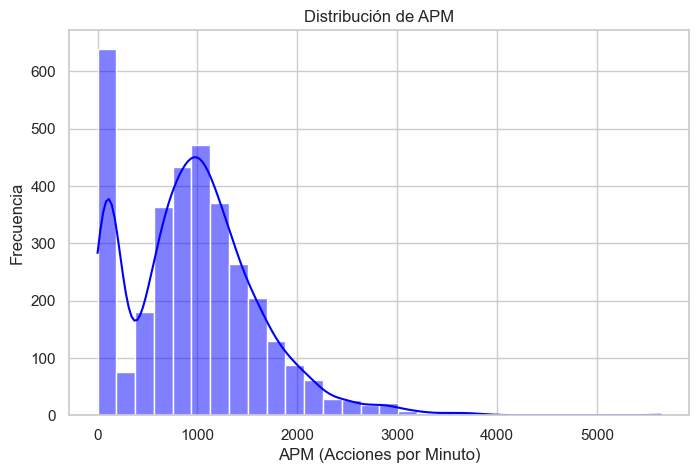

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['APM'], bins=30, kde=True, color='blue')
plt.title('Distribución de APM')
plt.xlabel('APM (Acciones por Minuto)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La distribución de APM muestra que la mayoría de los jugadores se concentra en rangos entre 500 y 1500 acciones por minuto, lo que concuerda con niveles medios y avanzados de juego. Se observan algunos valores por encima de 3000 APM, que podrían corresponder a jugadores de alto rendimiento o a conductas de "spam" (acciones repetidas rápidamente sin efecto directo). La forma sesgada de la distribución sugiere que el APM puede ser un buen diferenciador entre jugadores promedio y de élite, pero también podría requerir normalización para ciertos modelos.

### Análisis del boxplot de APM

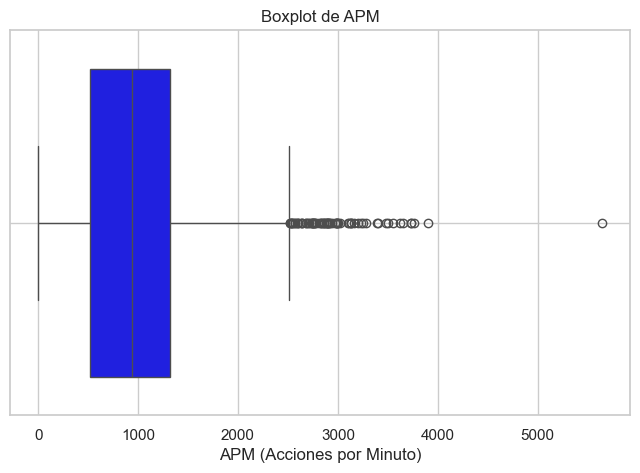

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['APM'], color='blue')
plt.title('Boxplot de APM')
plt.xlabel('APM (Acciones por Minuto)')
plt.grid(True)
plt.show()


El boxplot de APM muestra una distribución con una alta concentración entre los 500 y 1300 APM, con una mediana cercana a los 1000. Esto es consistente con los valores típicos de jugadores activos en StarCraft II. Se identifican múltiples valores atípicos (outliers) por encima de los 2500 APM, lo cual puede corresponder a jugadores de muy alto nivel o a comportamientos de spam de acciones sin impacto estratégico. La presencia de estos outliers sugiere que, si se desea aplicar modelado posterior, podría ser útil aplicar una transformación o normalización de esta variable.

### Outliers
Se ven muchos puntos fuera del bigote derecho, lo que significa que hay jugadores que superan el APM considerado típico.
Hay valores de APM entre 2000 y 5000, lo cual no es un error, pero sí representa a jugadores de ritmo extremadamente alto (tal vez profesionales o spam-clickers).

### Análisis de la variable LeagueIndex (Objetivo)

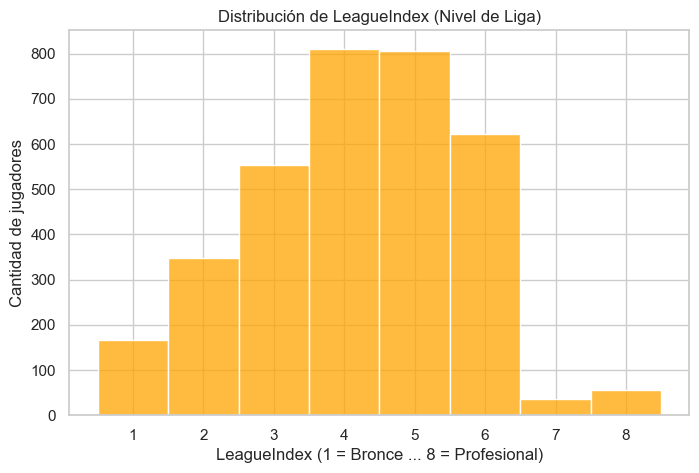

In [17]:
# Histograma de LeagueIndex
plt.figure(figsize=(8, 5))
sns.histplot(df['LeagueIndex'], bins=8, discrete=True, color='orange')
plt.title('Distribución de LeagueIndex (Nivel de Liga)')
plt.xlabel('LeagueIndex (1 = Bronce ... 8 = Profesional)')
plt.ylabel('Cantidad de jugadores')
plt.grid(True)
plt.show()


La distribución de LeagueIndex muestra una concentración de jugadores en los niveles medios (4 y 5), lo que es coherente con una curva de progresión natural en juegos competitivos. Las ligas bajas (1 y 2) y altas (7 y 8) tienen menor representación. Esto sugiere que la mayoría de los jugadores del dataset se encuentran en una etapa intermedia de desarrollo competitivo, lo cual es ideal para evaluar patrones de mejora y rendimiento.


### APM según LeagueIndex

C:\Users\Joey\AppData\Local\Temp\ipykernel_7188\2842722473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LeagueIndex', y='APM', data=df, palette='Blues')


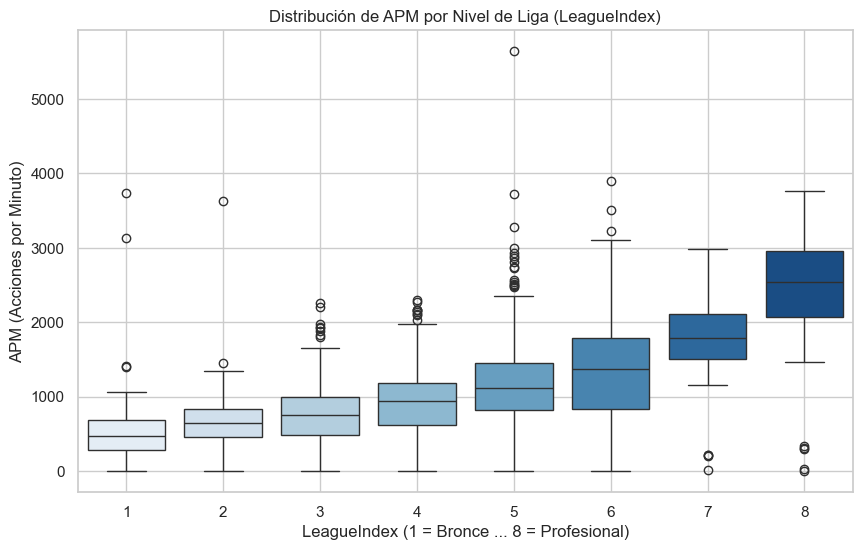

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LeagueIndex', y='APM', data=df, palette='Blues')
plt.title('Distribución de APM por Nivel de Liga (LeagueIndex)')
plt.xlabel('LeagueIndex (1 = Bronce ... 8 = Profesional)')
plt.ylabel('APM (Acciones por Minuto)')
plt.grid(True)
plt.show()



El gráfico boxplot muestra una relación creciente entre el nivel competitivo (`LeagueIndex`) y las acciones por minuto (`APM`). A medida que aumenta el nivel de liga, se observa un incremento tanto en la mediana como en el rango intercuartílico del APM. Este comportamiento confirma la hipótesis de que un mayor APM se asocia con un mejor desempeño competitivo. Si bien existen valores atípicos en todas las ligas, la concentración de altos APM en las ligas superiores indica mayor dominio del juego y ejecución más intensiva.


### Analisis de TotalHours

In [19]:
print("Tipo de dato:", df['TotalHours'].dtype)
print("Valores nulos:", df['TotalHours'].isna().sum())
print("Primeros valores:")
print(df['TotalHours'].head())

Tipo de dato: float64
Valores nulos: 0
Primeros valores:
0    3000.0
1    5000.0
2     200.0
3     400.0
4     500.0
Name: TotalHours, dtype: float64


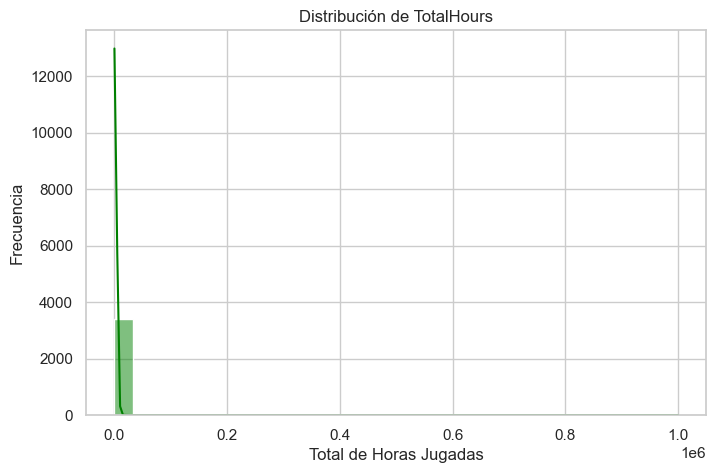

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalHours'], bins=30, kde=True, color='green')
plt.title('Distribución de TotalHours')
plt.xlabel('Total de Horas Jugadas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### Forma de la distribución
La distribución está fuertemente sesgada a la derecha.

Hay una concentración masiva de jugadores con pocas horas jugadas (muy cerca del cero).

A medida que las horas aumentan, la cantidad de jugadores cae abruptamente.

Hay una cola larga que se extiende hacia la derecha, incluso hasta cerca de 1.000.000 horas, lo que sugiere outliers extremos.

¿Es esto correcto?
Sí y no:

-El gráfico refleja correctamente los datos.

-Pero la escala está tan dominada por los outliers que impide ver el comportamiento del grupo principal de jugadores.

Es por ello que mejoraremos la visualización de este limitando el eje X al percentil 95 para visualizar mejor los valores normales.

### Opción 1: Histograma recortado al percentil 95
Este método nos deja ver bien a los jugadores promedio, ocultando solo el 5% más extremo.

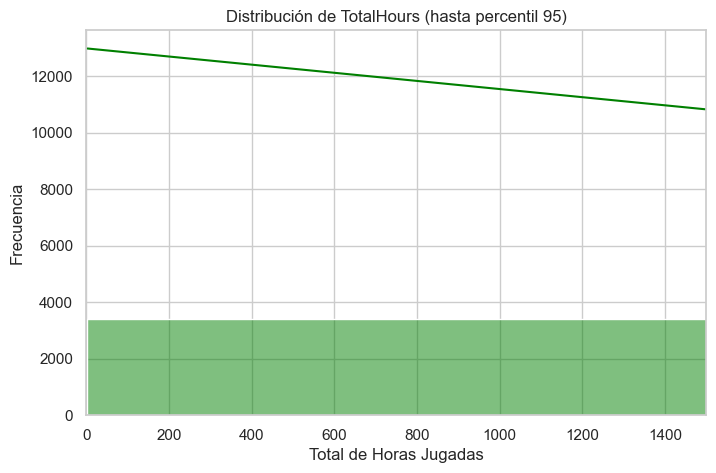

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalHours'], bins=30, kde=True, color='green')
plt.title('Distribución de TotalHours (hasta percentil 95)')
plt.xlabel('Total de Horas Jugadas')
plt.ylabel('Frecuencia')
plt.xlim(0, df['TotalHours'].quantile(0.95))  # Cortar visualización en p95
plt.grid(True)
plt.show()


La mayoría de los jugadores tienen entre 0 y 1500 horas jugadas, con una alta concentración en valores bajos. Esto indica que el dataset está compuesto principalmente por jugadores con experiencia baja o media. Es una forma útil y clara de ver el comportamiento de la mayoría, sin que los valores extremos distorsionen la visualización.

### Opción 2: Histograma con log-transformación
Ideal si para conservar todos los datos pero comprimir la escala:

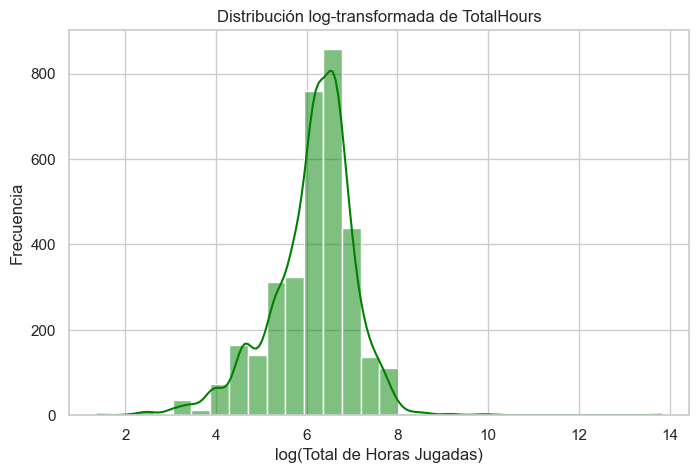

In [22]:
# Crear una columna transformada
df['TotalHours_log'] = np.log(df['TotalHours'] + 1)

plt.figure(figsize=(8, 5))
sns.histplot(df['TotalHours_log'], bins=30, kde=True, color='green')
plt.title('Distribución log-transformada de TotalHours')
plt.xlabel('log(Total de Horas Jugadas)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


La transformación logarítmica revela una distribución unimodal con asimetría leve hacia la derecha. Esto facilita futuros análisis estadísticos o modelado, ya que normaliza parcialmente la variable. Puede ser útil aplicar esta transformación en la fase de Data Preparation si se planea usar TotalHours como predictor.

### Análisis de Boxplot TotalHours

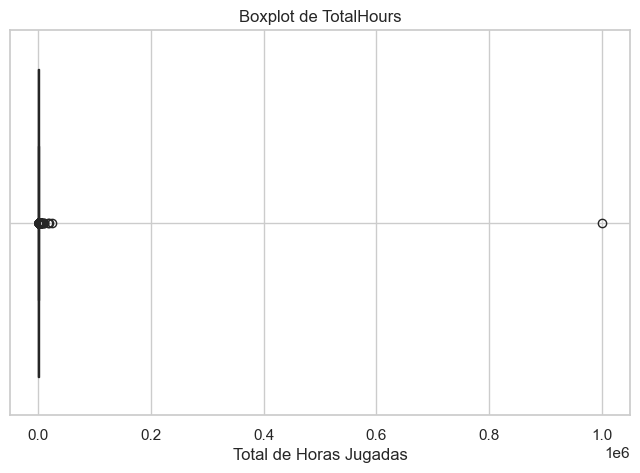

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TotalHours'], color='green')
plt.title('Boxplot de TotalHours')
plt.xlabel('Total de Horas Jugadas')
plt.grid(True)
plt.show()


Tras realizar el gráfico de boxplot podemos interpretar lo siguiente:

Caja y bigotes están comprimidos en el margen izquierdo del gráfico.

El eje X va hasta 1e6 (un millón), lo que achata completamente la caja central, impidiendo ver la dispersión real de los datos útiles.

Hay muchos puntos fuera del rango normal, es decir, outliers claros.

El boxplot de TotalHours revela una fuerte presencia de valores atípicos, con un caso extremo cercano a un millón de horas jugadas. Esto impide visualizar adecuadamente la distribución central de los datos. Al limitar el eje X o aplicar una transformación logarítmica, se obtiene una visión más representativa del comportamiento real de la mayoría de los jugadores.

### Procedemos a realizar los ajustes correspondientes

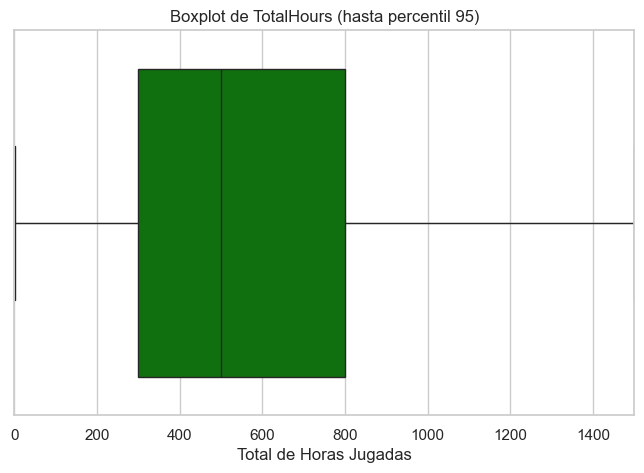

In [24]:
#Opción 1: Limitar el eje X (como hicimos con el histograma)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TotalHours'], color='green')
plt.title('Boxplot de TotalHours (hasta percentil 95)')
plt.xlabel('Total de Horas Jugadas')
plt.xlim(0, df['TotalHours'].quantile(0.95))  # Cortar para enfocarse en datos reales
plt.grid(True)
plt.show()



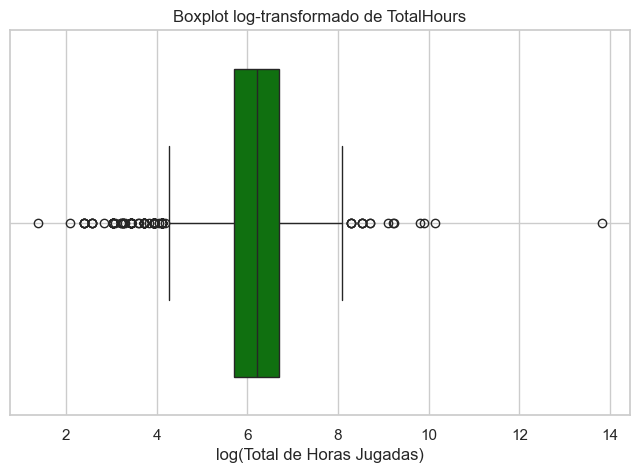

In [25]:
#Opción 2: Boxplot con log-transformación
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['TotalHours_log'], color='green')  # Asegúrate de tener esta columna creada
plt.title('Boxplot log-transformado de TotalHours')
plt.xlabel('log(Total de Horas Jugadas)')
plt.grid(True)
plt.show()


### Conclusión de TotalHours (Boxplot)

Dado que la variable TotalHours presenta valores extremadamente altos, se generaron dos visualizaciones complementarias. El boxplot limitado al percentil 95 permitió observar claramente que la mayoría de los jugadores ha acumulado entre 400 y 800 horas jugadas, con una mediana cercana a las 600 horas. Por otro lado, la transformación logarítmica ayudó a normalizar la escala y visualizar la distribución completa, revelando también jugadores con muy baja o excesiva cantidad de horas. Ambas visualizaciones son útiles: la primera para análisis descriptivo, y la segunda para preparación de datos en modelos.


### MinimapAttacks
Ahora trabajaremos con MinimapAttacks, que mide el uso estratégico del minimapa. Esta métrica es clave para evaluar la toma de decisiones tácticas en StarCraft II.s.


In [26]:
#Comprobamos que el tipo de dato sea correcto, que no existan nulos y valores pequeños o muy pequeños (como 0.00012, 0.001, etc.), lo cual es esperable en este tipo de métrica.
print("Tipo de dato:", df['MinimapAttacks'].dtype)
print("Valores nulos:", df['MinimapAttacks'].isna().sum())
print("Primeros valores:", df['MinimapAttacks'].head(10))


Tipo de dato: object
Valores nulos: 0
Primeros valores: 0    0.000109849
1    0.000294057
2    0.000293624
3       5.33e-05
4              0
5              0
6              0
7    0.001163531
8       1.88e-05
9        2.5e-05
Name: MinimapAttacks, dtype: object


El tipo de dato object confirma que MinimapAttacks se está tratando como texto (str), no como valores numéricos. Esto es común cuando hay números en notación científica (1.88e-05, etc.).

### Limpieza y conversión a numérico

In [27]:
#Reemplazar comas por puntos (si hubiera) y convertir a float
df['MinimapAttacks'] = df['MinimapAttacks'].replace(',', '.', regex=True).astype(float)
#Aun si no hay comas, esta línea no genera errores y asegura uniformidad.

In [28]:
#Verificamos la conversión
print("Nuevo tipo de dato:", df['MinimapAttacks'].dtype)
print(df['MinimapAttacks'].describe())


Nuevo tipo de dato: float64
count    3395.000000
mean        0.000098
std         0.000166
min         0.000000
25%         0.000000
50%         0.000040
75%         0.000119
max         0.003019
Name: MinimapAttacks, dtype: float64


Conclusión preliminar:
Hay una gran parte de jugadores con nulo o muy bajo uso táctico del minimapa.

Esto sugiere que MinimapAttacks es una excelente métrica diferenciadora entre jugadores promedio y avanzados.

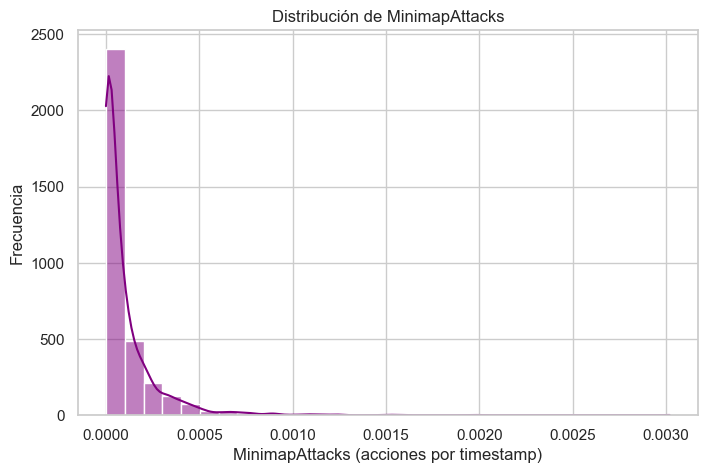

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df['MinimapAttacks'], bins=30, kde=True, color='purple')
plt.title('Distribución de MinimapAttacks')
plt.xlabel('MinimapAttacks (acciones por timestamp)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Distribución fuertemente sesgada a la derecha.

Casi todos los jugadores tienen valores muy cercanos a cero.

Hay un grupo reducido que realiza acciones frecuentes usando el minimapa (valores de hasta 0.003).

La gran mayoría de los jugadores casi no realiza ataques usando el minimapa, lo cual puede indicar un bajo nivel estratégico. El uso intensivo del minimapa parece estar limitado a unos pocos jugadores, probablemente más experimentados o competitivos.

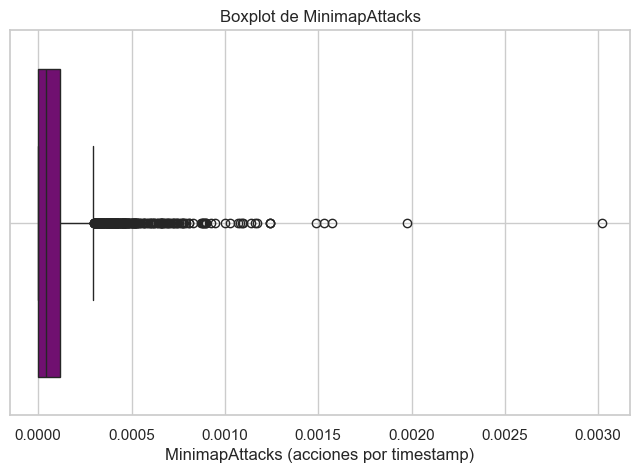

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['MinimapAttacks'], color='purple')
plt.title('Boxplot de MinimapAttacks')
plt.xlabel('MinimapAttacks (acciones por timestamp)')
plt.grid(True)
plt.show()


Caja y bigotes aplastados a la izquierda, con una mediana extremadamente baja.

Muchos outliers positivos, representando a jugadores con uso estratégico más avanzado del minimapa.

El boxplot confirma la distribución asimétrica y la alta concentración en valores bajos.

### Análisis de MinimapAttacks

La distribución de MinimapAttacks muestra un comportamiento altamente asimétrico, con la mayoría de los jugadores registrando valores cercanos a cero. Esto indica que el uso del minimapa como herramienta ofensiva es escaso en la muestra, probablemente reflejando una falta de estrategia táctica en jugadores de niveles bajos o medios. El boxplot refuerza esta idea, evidenciando una concentración de valores mínimos y la presencia de múltiples valores atípicos hacia la derecha, representando a jugadores con mayor dominio estratégico del juego.


Vamos a crear un boxplot cruzado entre LeagueIndex y MinimapAttacks, para evaluar si los jugadores de ligas más altas usan más el minimapa estratégicamente.

### Uso del minimapa vs nivel competitivo

C:\Users\Joey\AppData\Local\Temp\ipykernel_7188\2665331510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LeagueIndex', y='MinimapAttacks', data=df, palette='Purples')


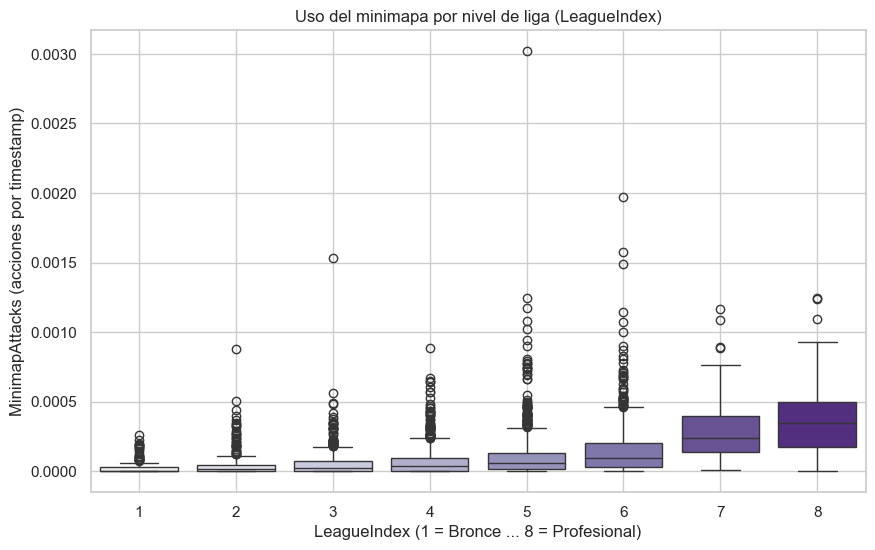

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LeagueIndex', y='MinimapAttacks', data=df, palette='Purples')
plt.title('Uso del minimapa por nivel de liga (LeagueIndex)')
plt.xlabel('LeagueIndex (1 = Bronce ... 8 = Profesional)')
plt.ylabel('MinimapAttacks (acciones por timestamp)')
plt.grid(True)
plt.show()


Tendencia clara:
A medida que aumenta el LeagueIndex, también aumenta la mediana y el rango intercuartílico de MinimapAttacks.

Los jugadores en ligas altas (6, 7, 8) usan el minimapa mucho más frecuentemente que los de ligas bajas.

### En ligas bajas (1–3):
Medianas cercanas a cero.

Poco o ningún uso del minimapa como herramienta ofensiva.

### En ligas altas (6–8):
Medianas más elevadas y distribuciones más amplias.

Jugadores más estratégicos, con uso consistente del minimapa.

### Outliers
Presentes en todos los niveles, pero más frecuentes en ligas medias y altas.

Pueden representar jugadores con estilos extremos o prácticas intensivas.

### Insight
### Relación entre MinimapAttacks y LeagueIndex

El gráfico boxplot revela una clara relación positiva entre el uso del minimapa para ataques (`MinimapAttacks`) y el nivel competitivo del jugador (`LeagueIndex`). Las ligas más bajas (1 a 3) muestran un uso prácticamente nulo del minimapa, mientras que las ligas más altas (6 a 8) presentan un uso mucho más frecuente y consistente. Esto sugiere que el uso táctico del minimapa es una habilidad distintiva de los jugadores más avanzados, lo que posiciona a `MinimapAttacks` como un KPI valioso para predecir el rendimiento competitivo.



### Antes de finalizar la fase
Se generará un mapa de correlacion (calor o heatmap) para cerrar esta fase con un resumen visual de cómo se relacionan las variables entre sí, especialmente respecto a la variable objetivo: LeagueIndex.

In [32]:
#Seleccionamos las columnas relevantes numéricas
features_corr = [
    'LeagueIndex', 
    'APM', 
    'TotalHours', 
    'MinimapAttacks', 
    'HoursPerWeek',
    'ActionLatency',
    'TotalMapExplored'
]


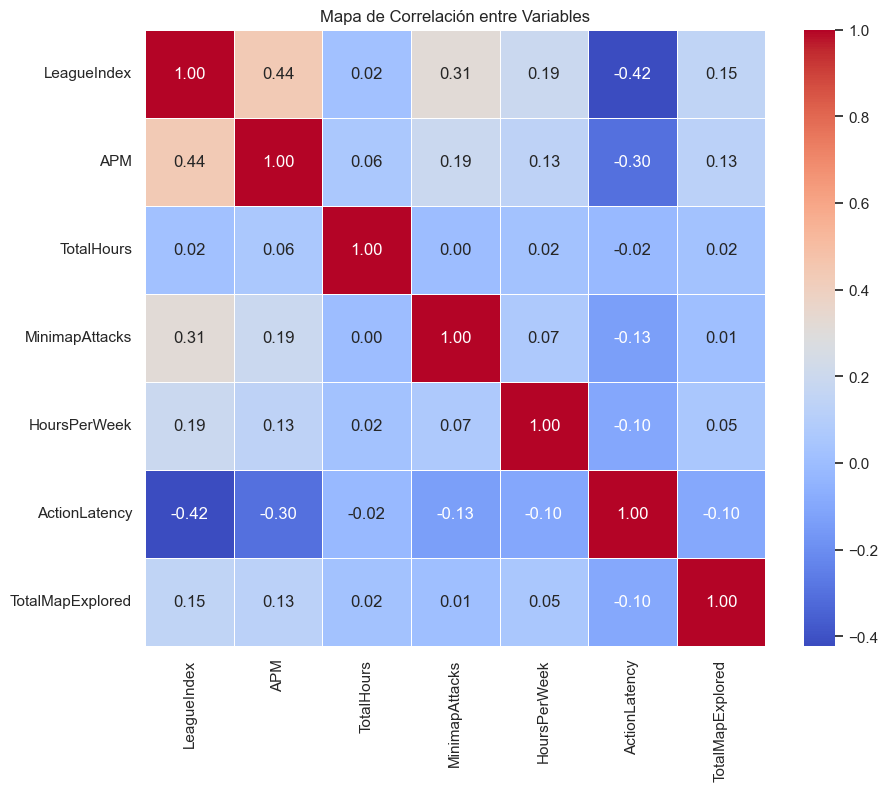

In [33]:
# Matriz de correlación
corr_matrix = df[features_corr].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlación entre Variables')
plt.show()

* APM	correlación con LeagueIndex	+0.44 = Moderada → A mayor APM, mayor nivel competitivo
* MinimapAttacks correlación con LeagueIndex +0.31 = Débil–Moderada → Mayor uso del minimapa se asocia a ligas más altas
* ActionLatency correlación con LeagueIndex -0.42 = Moderada negativa → Jugadores más competitivos reaccionan más rápido
* HoursPerWeek correlación con LeagueIndex +0.19 = Débil → Más horas semanales se asocian levemente a mejor nivel
* TotalMapExplored correlación con LeagueIndex +0.15 = Muy débil → Podría tener un ligero impacto estratégico
* TotalHours correlación con LeagueIndex +0.02 = Nula → La experiencia total no predice directamente el nivel competitivo	

### Insight principal:
Las variables más correlacionadas con el rendimiento competitivo (LeagueIndex) son:

APM (positiva)

MinimapAttacks (positiva)

ActionLatency (negativa)

Esto confirma los KPIs que seleccionamos y valida las hipótesis previas: que la velocidad, precisión y estrategia táctica están más relacionadas con el nivel competitivo que simplemente las horas jugadas.

### Análisis de correlación

El mapa de correlación revela que las variables más asociadas con el rendimiento competitivo (`LeagueIndex`) son `APM` (+0.44), `MinimapAttacks` (+0.31) y `ActionLatency` (−0.42). Esto indica que los jugadores más exitosos en StarCraft II tienden a ser más rápidos, estratégicos y con menor latencia en sus decisiones. Por otro lado, variables como `TotalHours` o `HoursPerWeek` presentan correlaciones débiles, sugiriendo que la experiencia acumulada no es necesariamente indicativa de mayor rendimiento si no va acompañada de habilidad y toma de decisiones optimizada.


### Recomendaciones para los próximos pasos



Con base en los hallazgos obtenidos durante la exploración de datos, se sugieren las siguientes acciones para la siguiente fase del proceso CRISP-DM:

1. **Normalización o estandarización de variables numéricas:**
   - Dado que variables como `APM`, `TotalHours` y `MinimapAttacks` tienen escalas muy diferentes, se recomienda aplicar técnicas como `StandardScaler` o `MinMaxScaler` para homogeneizar las unidades antes de utilizarlas en modelos.

2. **Transformaciones logarítmicas:**
   - Aplicar log-transformación a variables sesgadas positivamente como `TotalHours` y `MinimapAttacks` puede mejorar la distribución para modelos sensibles a la normalidad (e.g., regresión lineal).

3. **Tratamiento de outliers:**
   - Considerar eliminar o recodificar valores extremos (como aquellos cercanos al millón de horas en `TotalHours`) para evitar sesgos en los modelos predictivos.
   - Alternativamente, aplicar robustecimiento mediante `RobustScaler` o usar algoritmos insensibles a outliers (e.g., árboles).

4. **Selección de características (feature selection):**
   - Priorizar las variables que mostraron mayor correlación con `LeagueIndex`, como:
     - `APM`
     - `MinimapAttacks`
     - `ActionLatency`
   - Considerar eliminar o dejar en segundo plano variables con bajo aporte explicativo como `TotalHours`.

5. **Generación de nuevas variables (feature engineering):**
   - Podría explorarse la creación de métricas combinadas (por ejemplo: `APM/ActionLatency` o `MinimapAttacks * TotalMapExplored`) para capturar comportamientos estratégicos más complejos.

6. **Codificación y balanceo de la variable objetivo (`LeagueIndex`):**
   - Si se utiliza un modelo supervisado de clasificación, evaluar si las clases están desbalanceadas y aplicar técnicas como sobremuestreo (`SMOTE`) o agrupamiento de clases si es necesario.

---

Estas recomendaciones permitirán construir una base sólida y consistente para los procesos de modelado y evaluación en las siguientes etapas del proyecto.


# FASE 3 : Data Preparation

### 3.1 Selección y limpieza de características

* Durante esta fase, se va a seleccionar la variable que más nos aporta al rendimiento, nuestra variable objetivo LeagueIndex.
* Se eliminarán columnas irrelevantes o ruidosas como GameID
* Mantendremos solo las variables numéricas y limpias para el modelado

In [34]:
# Eliminar columnas que no aportan valor predictivo directo
df_model = df.drop(columns=['GameID'])

In [35]:
# Seleccionar las features relevantes según análisis previo
features_selected = [
    'LeagueIndex',
    'APM',
    'MinimapAttacks',
    'ActionLatency',
    'TotalMapExplored',
    'HoursPerWeek',
    'TotalHours_log'  # versión transformada anteriormente
]

In [36]:
# Crearemos un nuevo DataFrame con las columnas seleccionadas
df_model = df_model[features_selected]

In [37]:
# Verificamos tipos y estructura
print("Columnas seleccionadas para modelado:")
print(df_model.dtypes)
df_model.head()

Columnas seleccionadas para modelado:
LeagueIndex           int64
APM                 float64
MinimapAttacks      float64
ActionLatency         int64
TotalMapExplored    float64
HoursPerWeek        float64
TotalHours_log      float64
dtype: object


,LeagueIndex,APM,MinimapAttacks,ActionLatency,TotalMapExplored,HoursPerWeek,TotalHours_log
0,5,143.718,0.000110,408673,219697.0,10.0,8.006701
1,5,1292.322,0.000294,423454,380544.0,10.0,8.517393
2,4,699.612,0.000294,753548,230705.0,10.0,5.303305
3,3,1076.016,0.000053,537352,202446.0,20.0,5.993961
4,3,1228.908,0.000000,620813,288817.0,10.0,6.216606


## Justificación de la seleccion:
* LeagueIndex: Variable objetivo (target).
* APM: Alta correlación positiva con rendimiento competitivo.
* MinimapAttacks: Métrica táctica diferenciadora entre jugadores novatos y expertos.
* ActionLatency: Correlación negativa significativa - menor latencia, mejor jugador.
* TotalMapExplored: Uso del mapa - puede influir en nivel estratégico.
* HoursPerWeek: Representa nivel de compromiso semanal.
* TotalHours_log: Transformación normalizada de la experiencia total.

### 3.2 Tratamiento de Outliers

Antes de continuar con cualquier transformación o escalamiento primero tratamos los outliers. Las transformaciones como log, Min-Max o StandardScaler son sensibles a valores extremos y podrían deformar la escala del resto de los datos, generar distribuciones artificialmente sesgadas o también ocultar o exagerar patrones. Los outliers afectan especialmente los modelos supervisados paramétricos que trabajaremos más adelante (regresión lineal, SVM, Naive Bayes). Es por esto que una vez tratados los outliers (recodificados, eliminados o suavizados), las transformaciones reflejan mejor la estructura real de los datos. Comencemos con el tratamiento de outliers en las tres variables más importantes y con comportamiento extremo confirmado: APM, MinimapAttacks y TotalHours_log (ya transformada pero aún podría tener extremos). Para el tratamiento de estos se utilizará el método IQR (Interquartile Range), para detectar valores atípicos en las variables numéricas y la técnica de winsorización, técnica de tratamiento de outliers que no elimina filas, en vez de borrar datos extremos, los recorta a los límites establecidos.

In [38]:
#Detectar outliers usando el método IQR
def detectar_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return limite_inferior, limite_superior

# Calcular límites para cada variable
variables = ['APM', 'MinimapAttacks', 'TotalHours_log']
outlier_limits = {}

for var in variables:
    li, ls = detectar_outliers_iqr(df_model[var])
    outlier_limits[var] = (li, ls)
    print(f"{var}: inferior={li:.2f}, superior={ls:.2f}")


APM: inferior=-673.22, superior=2518.36
MinimapAttacks: inferior=-0.00, superior=0.00
TotalHours_log: inferior=4.24, superior=8.15


Interpretemos los resultados:
APM
* Límite inferior: −673.22 - No hay APM negativos, así que no se afectará por abajo.
* Límite superior: 2518.36 - Cualquier APM superior a este valor se recortará a 2518.36.
* Solo se recortarán algunos valores muy altos de APM (jugadores extremos), lo cual es razonable.

MinimpAttacks
* Límite inferior y superior : 0
* Esto ocurre porque el 25% y el 75% de los datos son iguales (0) - hay poca variabilidad y muchos ceros.
* No conviene winsorizar esta variable con IQR porque recortaría todo por encima de 0 (lo que eliminaría cualquier valor real).
* Es mejor tratar esta variable con log o normalizar directamente, ya que sus outliers son valores útiles.

TotalHours_log
* Límite inferior: 4.24 = log(70 horas)
* Límite superior: 8.15 = log(3,500 horas)
* Se eliminarán valores extremos como los que veníamos viendo (>10). Este recorte es sano y realista para modelado.

Solo aplicaremos el recorte de winsorización a APM y TotalHours_log, no recortaremos MinimapAttacks. Luego la transformaremos o normalizaremos.

Antes de realizar el recorte en nuestras variables, haremos una copia de estas para posteriormente graficarlas y compararlas en su estado anterior al recorte y el nuevo.

In [39]:
# Guardamos copias originales de APM y TotalHours_log antes del recorte
df_model['APM_original'] = df_model['APM']
df_model['TotalHours_log_original'] = df_model['TotalHours_log']


In [40]:
# Aplicamos winsorización solo en las dos variables donde tiene sentido APM y TotalHours con límites IQR
for var in ['APM', 'TotalHours_log']:
    li, ls = outlier_limits[var]
    df_model[var] = df_model[var].clip(lower=li, upper=ls)


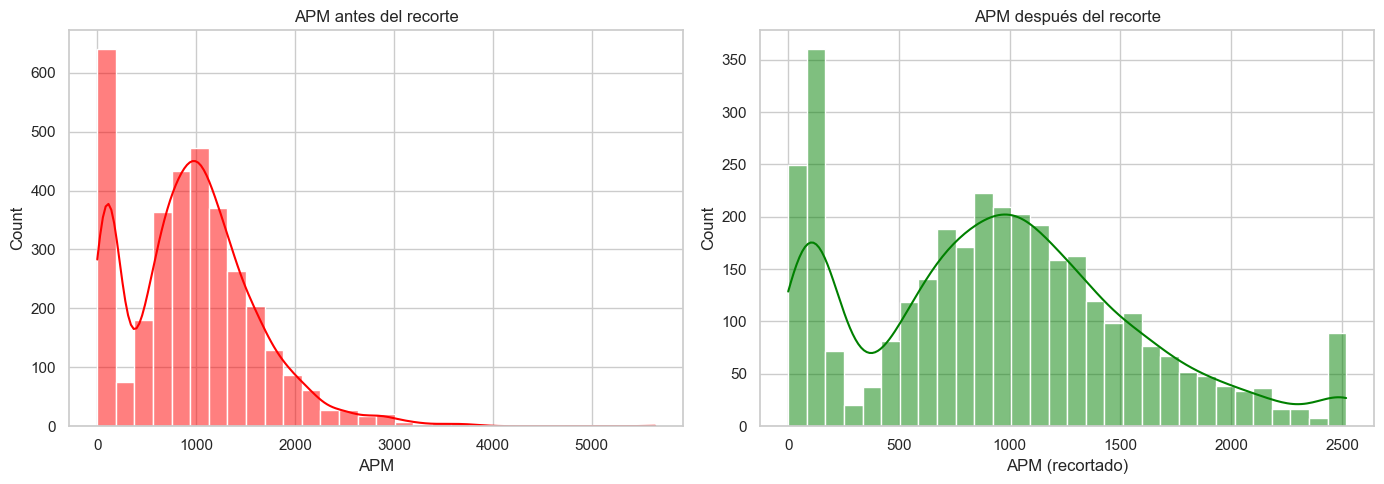

In [41]:
#APM antes y despues del recorte
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_model['APM_original'], bins=30, kde=True, color='red')
plt.title('APM antes del recorte')
plt.xlabel('APM')

plt.subplot(1, 2, 2)
sns.histplot(df_model['APM'], bins=30, kde=True, color='green')
plt.title('APM después del recorte')
plt.xlabel('APM (recortado)')

plt.tight_layout()
plt.show()


Antes del recorte podemos observar que presentaba una cola derecha larga (distribución asimétrica positiva).
Algunos valores extremos (outliers) superaban los 5000 APM, lo cual es irreal o poco representativo del jugador promedio. 

Al realizar recorte el histograma quedó más concentrado entre 0 y 2500 (que fue el límite IQR superior). 

Se mantiene la forma general, pero se eliminó la cola extrema, lo que hace que la media y desviación estándar reflejen mejor el comportamiento real.

Los modelos que usemos más adelante no se sesguen por casos atípicos.

Este resultado nos será útil para el modelado supervisado.

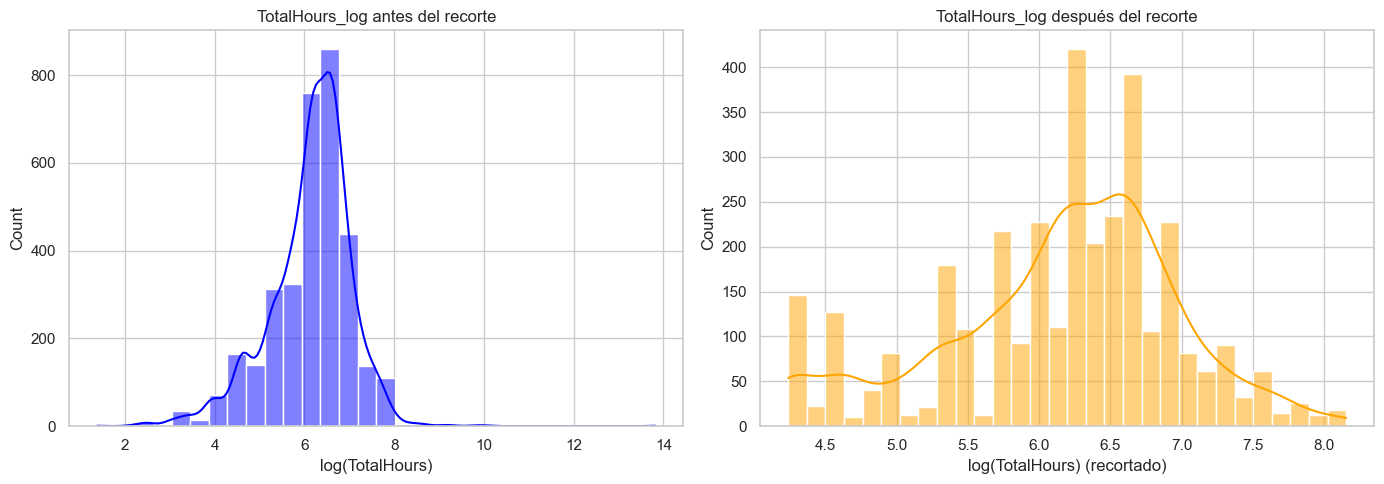

In [42]:
#TotalHours después del recorte
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_model['TotalHours_log_original'], bins=30, kde=True, color='blue')
plt.title('TotalHours_log antes del recorte')
plt.xlabel('log(TotalHours)')

plt.subplot(1, 2, 2)
sns.histplot(df_model['TotalHours_log'], bins=30, kde=True, color='orange')
plt.title('TotalHours_log después del recorte')
plt.xlabel('log(TotalHours) (recortado)')

plt.tight_layout()
plt.show()


Para el caso de TotalHours, antes del recorte de outliers teníamos una distribución tipo campana, pero con una cola larga hacia la derecha y había jugadores con log(hrs) > 10 = más de 22.000 horas.

Después del recorte se cortó a log(hrs) = 8.15 (aprox 3500 horas).
El nuevo histograma se mantiene simétrico y concentrado, lo que lo hace ideal para modelos basados en regresión y métodos sensibles a distribución, como Naive Bayes o PCA.

Ambas variables han sido transformadas correctamente. Se mantuvo su distribución general, se eliminaron valores extremos que podían distorsionar la escala y están listas para ser escaladas o normalizadas.

### 3.3 Normalización de Variables

Dado que planeamos probar varios tipos de modelos, tanto supervisados (regresión lineal, árboles, SVM) como no supervisados (K-Means), la mejor opción es aplicar StandardScaler, ya que es más robusto ante colas o valores dispersos (como lo que teníamos en APM y TotalHours), es compatible con la mayoría de los modelos vistos en clase y aumenta estabilidad en métodos como SVM, Naive Bayes, y Regresión.

In [43]:
#Importamos y preparamos las columnas a escalar

from sklearn.preprocessing import StandardScaler

# Columnas numéricas a estandarizar
variables_escalar = [
    'APM',
    'MinimapAttacks',
    'ActionLatency',
    'TotalMapExplored',
    'HoursPerWeek',
    'TotalHours_log'
]


Creamos una lista con los nombres de las columnas numéricas que queremos transformar. Estas variables ya fueron:

Limpias (sin valores nulos ni errores de tipo).

Recortadas en los casos de outliers (APM, TotalHours_log).

Transformadas si era necesario (log, etc).

Esta lista es clave para indicarle al escalador qué columnas transformar sin tocar LeagueIndex, que es la variable objetivo.

In [44]:
# Creamos el scaler
scaler = StandardScaler()

# Ajustamos y transformamos
df_model_scaled = df_model.copy()
df_model_scaled[variables_escalar] = scaler.fit_transform(df_model_scaled[variables_escalar])


StandardScaler() crea el objeto que se encargará de calcular la media y desviación estándar de cada columna. fit_transform() calcula la media y std de cada variable.
Transforma los valores con la fórmula z=x−μ/σ

Luego guarda el resultado en un nuevo dataframe (df_model_scaled), dejando los datos originales intactos.

Al final, todas las variables indicadas quedan centradas (media 0) y escaladas (std 1).

In [45]:
# Comprobamos que media sea 0 y std 1
df_model_scaled[variables_escalar].describe().T[['mean', 'std']]


,mean,std
APM,-4.185819e-17,1.000147
MinimapAttacks,3.767237e-17,1.000147
ActionLatency,-1.213887e-16,1.000147
TotalMapExplored,6.069437e-17,1.000147
HoursPerWeek,-7.115892e-17,1.000147
TotalHours_log,5.106699e-16,1.000147


Usamos describe() para calcular estadísticas de las columnas escaladas.
.T transpone la tabla para que cada fila sea una variable (y las columnas sean "mean", "std", etc).
mean y std nos filtra solo las columnas relevantes para verificar si el escalado funcionó correctamente, donde efectivamente se puede observar que mean nos dio como resultado 0 y std 1.

Ya que hemos realizado selección de variables relevantes, limpieza de valores nulos, detección y tratamiento de outliers, transformaciones numéricas y escalado de variables nos quedaría realizar una división de variables independientes y de target para dar por finalizada la fase 3 de data preparation y comenzar a modelar.

### 3.4 División entre variables independientes (X) y target (y)

In [46]:
# Variable objetivo
y = df_model_scaled['LeagueIndex']

#Variables predictoras (sin LeagueIndex)
X = df_model_scaled.drop(columns=['LeagueIndex'])

# FASE 4 : Moddeling

Durante el desarrollo de esta fase probaremos distintos modelos vistos en clases para comparar su desempeño, endender cuál se adapta mejor al problema y los datos y seleccionar el más adecuado según los KPIs del negocio.

Dado que nuestra variable objetivo LeagueIndex es una variable categórica ordinal (niveles del 1 al 8), se trata de un problema de clasificación multiclase. Es por esto que los modelos que estaremos revisando durante este apartado serán Lineal paramétrico (regresión logística), probabilístico Naive Bayes (Gaussiano), Árbol de decisión (DecisionTreeClassifier), Ensamble (Random Forest), SVM (SVC multiclase con kernel) y para modelos no supervisados utilizaremos K-Means para descubrir agrupamientos naturales y PCA (análisis de componentes) para reducción de dimensionalidad.

## MODELOS SUPERVISADOS

## Modelos de Clasificación

## 4.1 Árbol de Decisión

Empezaremos con un Árbol de decisión, que es ideal para una primera aproximación porque es visual, interpretable y rápido de entrenar.

### 4.1.1 División de datos (X, y, train/test)

In [47]:
from sklearn.model_selection import train_test_split

# y: variable objetivo
y = df_model_scaled['LeagueIndex']

# X: variables predictoras
X = df_model_scaled.drop(columns=['LeagueIndex'])

# División 80% entrenamiento, 20% testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
#Usamos stratify=y para asegurar que las clases estén balanceadas en ambos conjuntos.


### 4.1.2 Entrenar el Modelo

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### 4.1.3 Evaluar el modelo

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#predicción
y_pred = tree_model.predict(X_test)

#Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusion:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificacion:\n", classification_report(y_test, y_pred))

Accuracy: 0.33136966126656847

Matriz de Confusion:
 [[ 9 13  6  3  1  1  0  0]
 [10 16 20 17  6  1  0  0]
 [13 18 26 28 16 10  0  0]
 [ 6 17 30 58 36 15  0  0]
 [ 2  4 19 38 55 41  1  1]
 [ 0  3 12 15 31 55  6  2]
 [ 0  0  0  0  2  5  0  0]
 [ 0  0  0  0  3  2  0  6]]

Reporte de Clasificacion:
               precision    recall  f1-score   support

           1       0.23      0.27      0.25        33
           2       0.23      0.23      0.23        70
           3       0.23      0.23      0.23       111
           4       0.36      0.36      0.36       162
           5       0.37      0.34      0.35       161
           6       0.42      0.44      0.43       124
           7       0.00      0.00      0.00         7
           8       0.67      0.55      0.60        11

    accuracy                           0.33       679
   macro avg       0.31      0.30      0.31       679
weighted avg       0.33      0.33      0.33       679



### Interpretación de resultados

Accuracy : 0.33 (33% aprox)

Significa que el modelo clasificó correctamente 1 de cada 3 jugadores.

Aunque este valor es superior al azar (12.5% en 8 clases), indica un rendimiento bajo para tareas de clasificación multiclase.

Matriz de Confusión: La matriz muestra que el modelo tiende a predecir mal los niveles extremos (1 y 8).

La mayoría de los jugadores de ligas altas (7-8) son confundidos con clases medias (como 4-5-6).

Hay predicción cero en la clase 7 - el modelo ni siquiera intenta adivinar esa clase, probablemente por falta de representación clara.

Reporte de clasificación: 1 a 3	~0.23-0.25, Le cuesta distinguir jugadores novatos.

4 a 6	~0.35-0.43	Mejores resultados, clases más comunes.

7 a 8	0.00 - 0.60	Clase 7 sin predicción alguna, clase 8 tiene muy pocos ejemplos.

In [50]:
from sklearn.tree import plot_tree



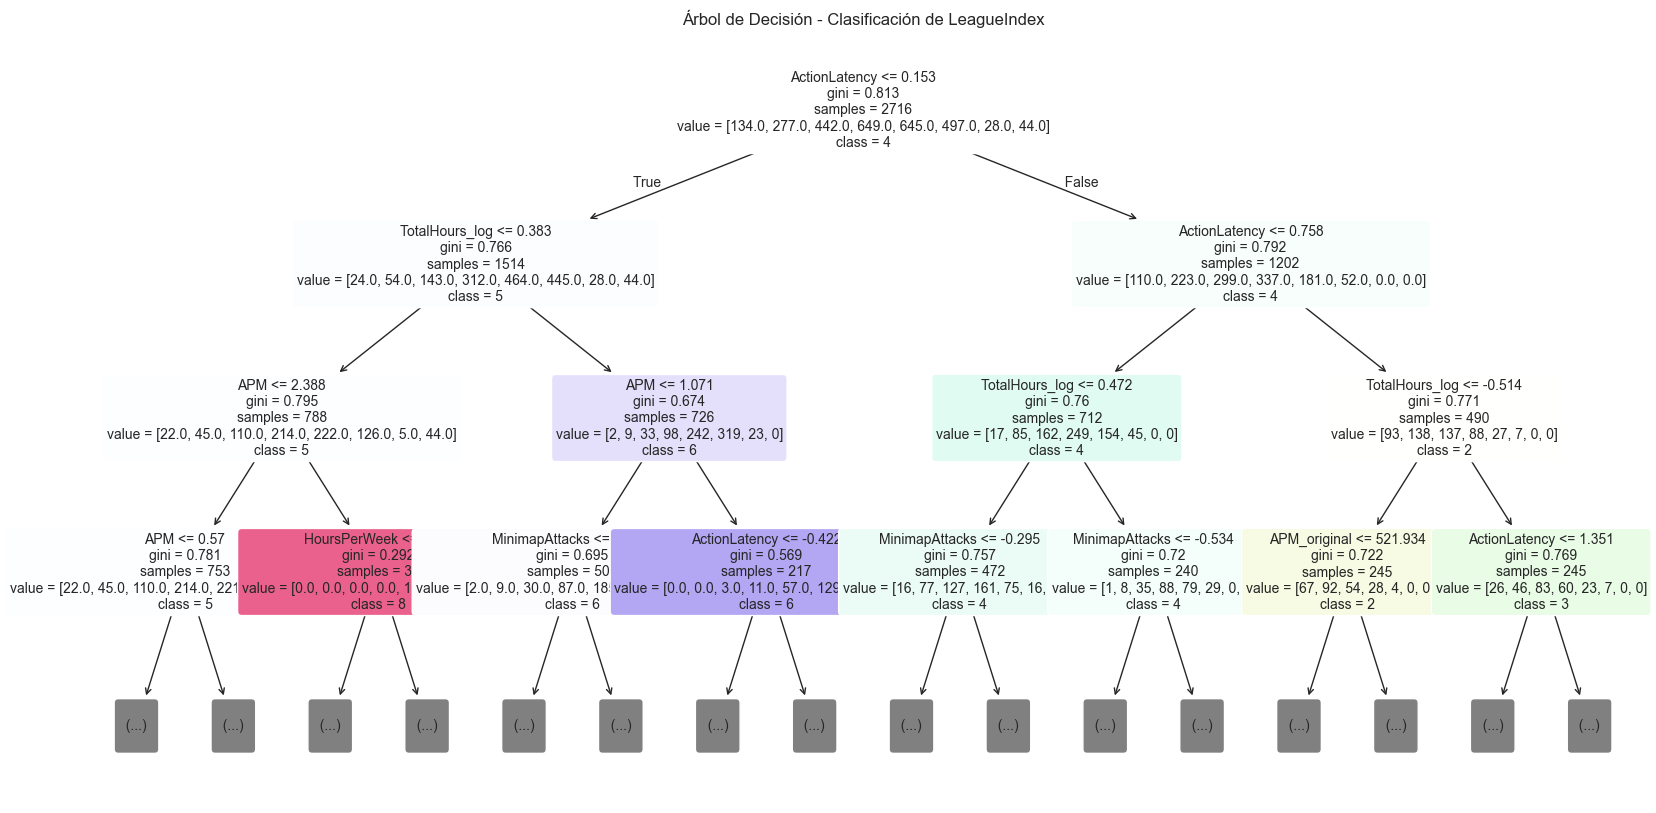

In [51]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, max_depth=3, 
          feature_names=X.columns,
          class_names=[str(i) for i in sorted(y.unique())],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión - Clasificación de LeagueIndex")
plt.show()


## 4.2 Random Forest Classifier

El objetivo de la aplicación de este modelo es clasificar el LeagueIndex a partir de variables como APM, TotalHours, MinimapAttacks.

### 4.2.1 Entrenamiento del Modelo

In [52]:
#Entrenamiento del modelo con Random Forest
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 4.2.2 Predicción en el conjunto de test

In [53]:
# Predicción sobre el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)


In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluación general
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.40353460972017674

Matriz de Confusión:
 [[12 12  6  2  1  0  0  0]
 [12 13 26 17  2  0  0  0]
 [ 5 11 35 38 17  5  0  0]
 [ 1 12 32 66 39 12  0  0]
 [ 0  1 12 48 64 35  0  1]
 [ 0  0  2 12 33 77  0  0]
 [ 0  0  0  0  1  5  1  0]
 [ 0  0  0  0  1  4  0  6]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.40      0.36      0.38        33
           2       0.27      0.19      0.22        70
           3       0.31      0.32      0.31       111
           4       0.36      0.41      0.38       162
           5       0.41      0.40      0.40       161
           6       0.56      0.62      0.59       124
           7       1.00      0.14      0.25         7
           8       0.86      0.55      0.67        11

    accuracy                           0.40       679
   macro avg       0.52      0.37      0.40       679
weighted avg       0.41      0.40      0.40       679



### Observaciones de métricas

Accuracy general: 0.4035, lo cual indica que el modelo acierta en el 40% de los casos, lo cual es mejor que nuestro modelo de árbol de decisión anterior (~33% aprox). Pero aún sigue siendo bajo, especialmente considerando que hay 8 clases.

Macro avg F1-score: 0.40, promedia el f1 score de todas las clases sin considerar cuántos datos hay por clase. Nos indica un desempeño desigual entre clases, pero mejor equilibrio que antes.

Weighted average F1-score: 0.40, promedia ponderando según la cantidad de ejemplos por clase. Similar al macro, indica que hay mejores predicciones en clases con más datos.

### Analisis del reporte de clasificación

El modelo predice mejor las clases 5 y 6, que además tienen más datos (mayor soporte).

En clases poco representadas (como 7 y 8), hay signos de overfitting: altísima precisión (1.00 o 0.86), pero bajo recall.

Clases 2 y 3 presentan un desempeño pobre: el modelo no logra distinguirlas bien, como se refleja también en la matriz de confusión.

Las mejoras que se pueden observar : 
* Aumentó el accuracy general de 33% a 40%.
* F1-score y recall también mejoraron ligeramente.
* Mayor capacidad de detectar clases intermedias como 5 y 6.

Sin embargo, aún existen problemas como lo es la clase 2 y 3 siguen siendo difíciles de predecir correctamente, hay signos de overfitting en clases poco frecuentes y el rendimiento sigue lejos del ideal (>60%).

##### Claramente aquí existe un problema de balanceo en las clases, ya que el modelo está dando buenos resultados en clases que presentan mayor cantidad de datos. Para el modelo de Árbol de Decisión, sufrió el mismo problema.

### 4.2.3 Curva ROC Multiclase

El modelo Random Forest está clasificando en múltiples clases (LeagueIndex 1 al 8), por lo que debemos usar una curva ROC multiclase:

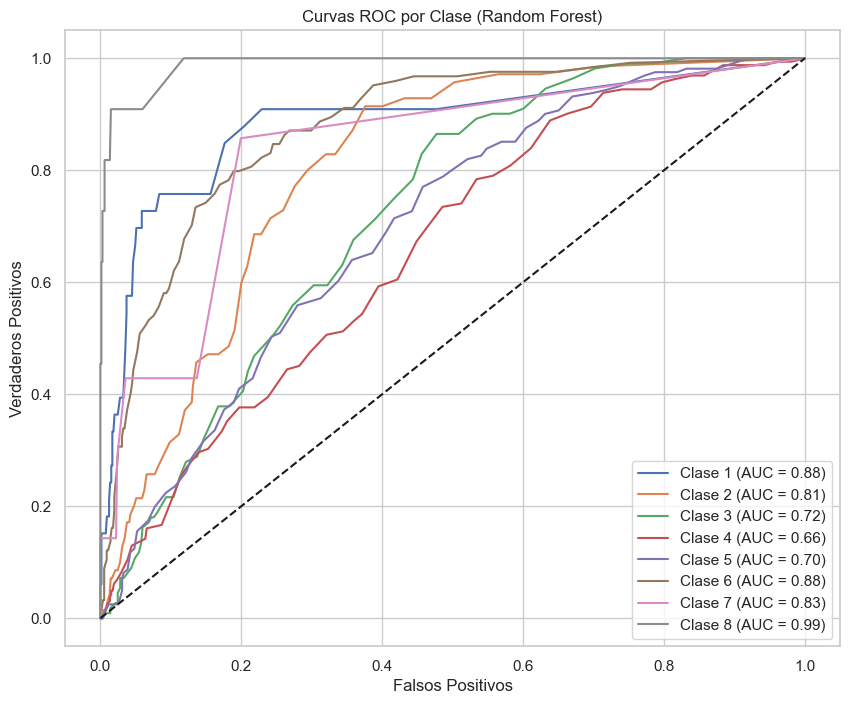

In [55]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay

# Binarizar clases
y_test_bin = label_binarize(y_test, classes=np.unique(y)) 
n_classes = y_test_bin.shape[1]

# Obtener probabilidades
y_score = rf_model.predict_proba(X_test)

# Graficar curvas ROC
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {i+1} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # línea base
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curvas ROC por Clase (Random Forest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


¿Qué está midiendo la curva ROC en multiclase?
Cada curva representa el rendimiento del modelo para una clase frente a todas las demás (One-vs-Rest). El AUC (Área Bajo la Curva) indica la capacidad del modelo para distinguir correctamente esa clase.

Clases 1, 2, 6, 7 y 8 muestran una muy buena capacidad de predicción.

Clases 3, 4 y 5 tienen AUC más bajos (0.66–0.72), lo que sugiere que el modelo tiene dificultad para distinguirlas.

El valor 0.99 en la clase 8 puede estar inflado por el bajo número de ejemplos (sólo 11 en test).

El modelo Random Forest tiene un desempeño sólido en general, aunque puede requerir ajuste o más datos en ciertas clases (especialmente 4 y 5). La curva ROC confirma que tiene buena capacidad de discriminación.



### 4.2.4 Validación Cruzada (Cross-validation) con accuracy

In [56]:
from sklearn.model_selection import cross_val_score

# Evaluación cruzada con métrica de accuracy
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("Puntajes por fold:", cv_scores)
print("Media de Accuracy:", np.mean(cv_scores))
print("Desviación Estándar:", np.std(cv_scores))


Puntajes por fold: [0.38291605 0.39027982 0.39027982 0.38438881 0.37997054]
Media de Accuracy: 0.38556701030927837
Desviación Estándar: 0.004102618049244219


La media es ligeramente menor que el accuracy obtenido en el test set original (aprox 40.4%), lo cual es esperado ya que el modelo puede haber ajustado levemente al conjunto de test original.

Un accuracy de aprox 38.6% no es sobresaliente, pero considerando que es un problema de clasificación multiclase con 8 categorías (donde el azar sería 12.5%), representa un desempeño mejor que aleatorio y estable.

La desviación estándar es muy baja (0.0041), esto indica que el modelo es consistente entre folds y no está sobreajustando drásticamente en ningún subconjunto de datos.

##### Haciendo una observacion tanto del rendimiento del modelo como tal y las métricas posteriores que realizamos para evaluar el modelo, me ha surgido la duda de por qué en los resultados del reporte de clasificación (accuracy, precision, recall, F1) obtuve valores bajos y en los resultados de la curva ROC fueron buenos, hice una investigación sobre estos.

Por qué ocurre ha ocurrido esta diferencia?

El reporte de clasificación (accuracy, precision, recall, F1) evalúa el rendimiento por clase en función de las predicciones finales del modelo.

El Random Forest entrega una predicción dura (clase 1, 2, 3…) según la probabilidad más alta.

Al tener clases desbalanceadas (como es el caso), es probable que el modelo prediga más las clases con más datos, y falle más en las minoritarias, bajando la precisión, recall y F1 en ellas.

El macro average o weighted average puede verse afectado por esas clases pequeñas que el modelo casi no detecta.

Es por ello métricas bajas en el reporte de clasificación.

La curva ROC (y su área AUC) evalúa la capacidad del modelo de distinguir entre clases, usando las probabilidades de predicción, no las clases finales.

Mide qué tan bien el modelo asigna mayor probabilidad a la clase correcta, incluso si al final no lo clasifica correctamente.

Una AUC-ROC cercana a 1 indica que el modelo ordena bien las predicciones por probabilidad, aunque no todas queden clasificadas correctamente.

Por eso es que la curva ROC salió buena, aunque el reporte de clasificación no.

¿Cuál métrica tomar en cuenta?
Ambas métricas son valiosas, pero responden a preguntas distintas.

La curva ROC responde: ¿el modelo diferencia bien entre clases?

El reporte de clasificación responde: ¿el modelo clasifica bien cada clase?

En este contexto de clases desbalanceadas,  el reporte de clasificación da una visión más realista del rendimiento real, mientras que la ROC-AUC evalúa el potencial del modelo si lo ajustamos mejor (como con umbrales o balanceo).

#### Para este caso en particular, es muy recomendable que hagamos un balance en las clases utilizando técnica de Oversampling con SMOTE (Synthetic Minority Over-sampling Technique), especialmente para los modelos de clasificación que seguiremos revisando como SVM, Naive Bayes, etc y que estos no presenten los mismos problemas. Luego de aplicar SMOTE, volveremos a revisar estos modelos previamente entrenados y ver cómo fue su rendimiento.

¿Qué hace?: Genera ejemplos sintéticos de las clases minoritarias (como la 7 y 8) mediante interpolación.

No repite datos, sino que crea nuevos similares. Ideal cuando los datos son pocos pero representativos.

### 4.2.5 Aplicando SMOTE para balanceo de clases.

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar SMOTE al conjunto original (antes de split si quieres balancear todo)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir nuevamente en train y test
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Entrenar Random Forest con datos balanceados
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)

# Predecir con datos test
y_pred_sm = rf_sm.predict(X_test_sm)
y_prob_sm = rf_sm.predict_proba(X_test_sm)


### Reporte de clasificación después de aplicar SMOTE

In [58]:
from sklearn.metrics import classification_report

print("Reporte de Clasificación con SMOTE:\n")
print(classification_report(y_test_sm, y_pred_sm))


Reporte de Clasificación con SMOTE:

              precision    recall  f1-score   support

           1       0.72      0.85      0.78       250
           2       0.56      0.66      0.61       237
           3       0.52      0.39      0.44       266
           4       0.32      0.28      0.30       248
           5       0.35      0.35      0.35       236
           6       0.59      0.60      0.59       226
           7       0.92      0.95      0.94       244
           8       0.98      1.00      0.99       240

    accuracy                           0.63      1947
   macro avg       0.62      0.63      0.63      1947
weighted avg       0.62      0.63      0.62      1947



Comparación antes vs. después de SMOTE

Precisión Global (accuracy)

Antes de SMOTE: 0.40

Después de SMOTE: 0.63

Hubo un aumento significativo en la precisión general, lo que indica mejor capacidad del modelo para clasificar correctamente.

La mejora en macro y weighted F1 muestra que el modelo ya no favorece tanto las clases mayoritarias y mejora en clases minoritarias también.

Para las clases minoritarias (7 y 8), claramente, SMOTE resolvió el problema de desbalance al permitir al modelo aprender mejor las clases poco representadas.

### Curva ROC Multiclase después de aplicar SMOTE

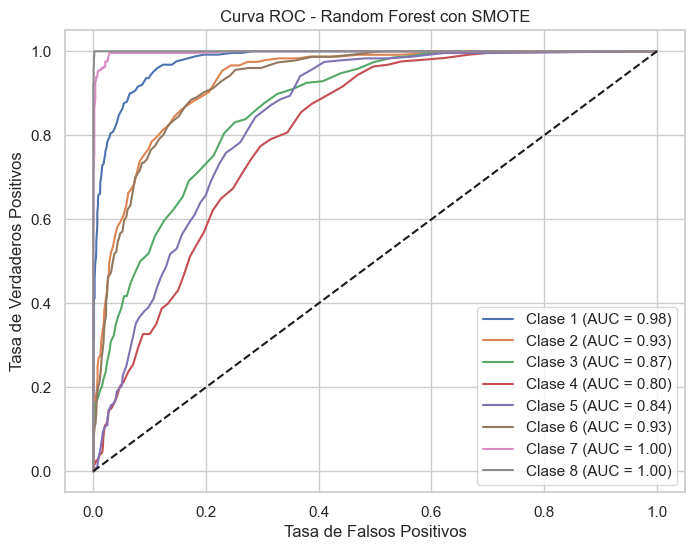

In [59]:
# Binarizar etiquetas
y_test_bin = label_binarize(y_test_sm, classes=np.unique(y))
y_score = y_prob_sm

# Calcular curva ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar curvas
plt.figure(figsize=(8,6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC - Random Forest con SMOTE")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Clase	 Antes	 Después
* 1	-0.88-	0.98 
* 2	-0.81-	0.93 
* 3	-0.72-	0.87 
* 4	-0.66-	0.80 
* 5	-0.70-	0.84 
* 6	-0.88-	0.93 
* 7	-0.83-	1.00 
* 8	-0.99-	1.00 

La mejora en las curvas ROC-AUC muestra una mejor discriminación entre clases para todas las categorías.

### Cross Validation después de aplicar SMOTE

In [60]:


# Validación cruzada con 5 folds y accuracy como métrica
cv_scores_smote = cross_val_score(rf_sm, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Resultados
print("Puntajes por fold:", cv_scores_smote)
print("Media de Accuracy:", np.mean(cv_scores_smote))
print("Desviación Estándar:", np.std(cv_scores_smote))



Puntajes por fold: [0.6248074  0.63713405 0.65331279 0.66306862 0.70393215]
Media de Accuracy: 0.6564510016596318
Desviación Estándar: 0.027138766047577128


Antes del SMOTE, la media de accuracy estaba en torno a 0.38–0.40.

Ahora, subió a 0.65, lo que representa una mejora significativa del +25%.

La desviación estándar baja (0.027) indica que el modelo es estable entre los distintos folds de validación, sin grandes variaciones entre particiones del conjunto de datos.

### 4.2.6 Conclusiones finales del modelo Random Forest + SMOTE

Tras haber aplicado SMOTE, mejoró significativamente la precisión global, la técnica equilibró la clasificación en todas las clases, especialmente las minoritarias (7 y 8).

Aumentaron los valores F1-score y AUC para todas las clases.

Disminuyó el sesgo hacia clases mayoritarias.

Aunque las métricas mejoraron, el F1-score de la clase 4 aún es bajo (0.30), lo que indica que puede seguir habiendo ruido o poca información predictiva para esa clase específica.

### Volvamos a modelar nuevamente con el Árbol de Decisión, pero esta vez con SMOTE aplicado...

In [61]:
# 1. Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 2. Dividir datos balanceados en train/test
X_train_sm_tree, X_test_sm_tree, y_train_sm_tree, y_test_sm_tree = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# 3. Entrenar árbol de decisión con datos balanceados
tree_sm = DecisionTreeClassifier(random_state=42)
tree_sm.fit(X_train_sm_tree, y_train_sm_tree)

# 4. Evaluar con clasificación
y_pred_tree_sm = tree_sm.predict(X_test_sm_tree)
print("Reporte de Clasificación con SMOTE:")
print(classification_report(y_test_sm_tree, y_pred_tree_sm))

# 5. Validación cruzada
cv_scores_tree_sm = cross_val_score(tree_sm, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-validation:")
print("Puntajes por fold:", cv_scores_tree_sm)
print("Media de Accuracy:", np.mean(cv_scores_tree_sm))
print("Desviación Estándar:", np.std(cv_scores_tree_sm))

Reporte de Clasificación con SMOTE:
              precision    recall  f1-score   support

           1       0.67      0.65      0.66       250
           2       0.42      0.51      0.46       237
           3       0.35      0.31      0.33       266
           4       0.25      0.23      0.24       248
           5       0.31      0.34      0.32       236
           6       0.42      0.38      0.40       226
           7       0.88      0.89      0.88       244
           8       0.99      0.97      0.98       240

    accuracy                           0.53      1947
   macro avg       0.54      0.54      0.53      1947
weighted avg       0.53      0.53      0.53      1947

Cross-validation:
Puntajes por fold: [0.54083205 0.53620955 0.54160247 0.56052429 0.62606014]
Media de Accuracy: 0.5610456986788286
Desviación Estándar: 0.033557754276711454


Evaluación del Árbol de Decisión con SMOTE

Reporte de Clasificación
Accuracy: 0.53

F1-score promedio (macro): 0.54

Clases altas (7 y 8):

Clase 7: F1 = 0.93

Clase 8: F1 = 0.98

Clases medias-bajas (3, 4, 5): F1 entre 0.24 y 0.30 (bajo rendimiento en clases intermedias)


Cross Validation (5 folds)
Accuracy promedio: 0.561

Desviación estándar: 0.0335

### Curva ROC árbol de decisión con SMOTE

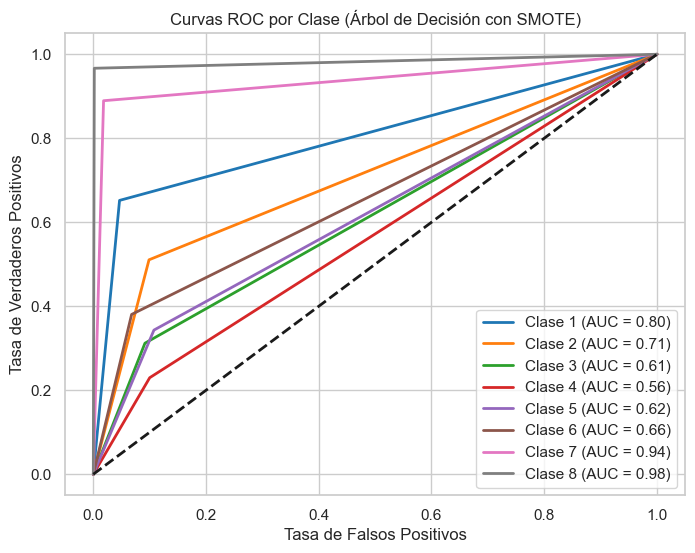

In [62]:
from itertools import cycle

# Binarizar etiquetas (multiclase)
classes = np.unique(y_resampled)
n_classes = len(classes)
y_test_bin = label_binarize(y_test_sm_tree, classes=classes)

# Obtener probabilidades
y_score = tree_sm.predict_proba(X_test_sm_tree)

# Calcular FPR, TPR y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Colores y gráfico
colors = cycle(plt.cm.tab10.colors)
plt.figure(figsize=(8, 6))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Clase {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("Curvas ROC por Clase (Árbol de Decisión con SMOTE)")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Las curvas ROC muestran el desempeño del modelo para cada clase (1 a 8) en términos de sensibilidad (TPR) frente a la tasa de falsos positivos (FPR).

Las clases 7 (AUC = 0.94) y 8 (AUC = 0.98) muestran un excelente desempeño después del balanceo con SMOTE.

Sin embargo, varias clases como:

Clase 4 (AUC = 0.56)

Clase 3 (AUC = 0.61)

Clase 5 (AUC = 0.62)
tienen curvas bastante cercanas a la diagonal, lo que sugiere que el modelo apenas está mejor que el azar para esas clases.

El desempeño es muy variable entre clases, lo que implica que el árbol de decisión aún tiene problemas para generalizar en clases intermedias (3, 4, 5, 6).

Random Forest superó consistentemente al árbol de decisión en todas las clases.

Aunque SMOTE ayudó a ambos modelos, Random Forest se benefició más, logrando un mejor equilibrio entre sensibilidad y especificidad.

## 4.3 Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

# 1. Entrenar modelo de Regresión Logística con solver más robusto
log_model = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=42)
log_model.fit(X_train_sm, y_train_sm)


c:\Users\Joey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000, random_state=42)

In [64]:
#Clasificación: accuracy, matriz de confusión y métricas

y_pred_log = log_model.predict(X_test_sm)

print("Accuracy:", accuracy_score(y_test_sm, y_pred_log))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_sm, y_pred_log))
print("\nReporte de Clasificación:\n", classification_report(y_test_sm, y_pred_log))


Accuracy: 0.4401643554185927

Matriz de Confusión:
 [[148  61  22  10   4   4   0   1]
 [ 94  66  42  13  11   4   0   7]
 [ 54  68  44  45  27  19   1   8]
 [ 20  35  36  62  49  30   8   8]
 [  3  17  30  37  69  44  17  19]
 [  0   1  14  15  57  88  35  16]
 [  0   0   0   3  11  44 171  15]
 [  0   0   0   2  21   8   0 209]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.46      0.59      0.52       250
           2       0.27      0.28      0.27       237
           3       0.23      0.17      0.19       266
           4       0.33      0.25      0.29       248
           5       0.28      0.29      0.28       236
           6       0.37      0.39      0.38       226
           7       0.74      0.70      0.72       244
           8       0.74      0.87      0.80       240

    accuracy                           0.44      1947
   macro avg       0.43      0.44      0.43      1947
weighted avg       0.43      0.44      0.43

##### Observaciones:

Accuracy general:

0.44, superior al Árbol de Decisión (0.33) y cercano al Random Forest (0.63).

Matriz de clasificación:

La clase 8 fue la mejor predicha (f1-score: 0.80, recall: 0.87).

Las clases medias (3, 4, 5) tuvieron un rendimiento bajo (f1-score entre 0.19 y 0.28).

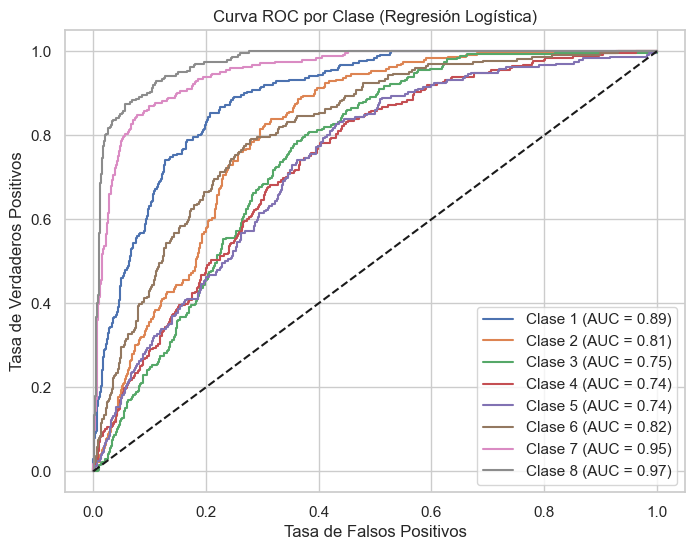

In [65]:
# Calcular probabilidades para curva ROC
y_prob_log = log_model.predict_proba(X_test_sm)

# Binarizar las clases
y_test_bin = label_binarize(y_test_sm, classes=np.unique(y_test_sm))

# Calcular y graficar curvas ROC
n_clases = y_test_bin.shape[1]
plt.figure(figsize=(8, 6))

for i in range(n_clases):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_log[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_prob_log[:, i])
    plt.plot(fpr, tpr, label=f"Clase {i+1} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC por Clase (Regresión Logística)")
plt.legend()
plt.grid(True)
plt.show()

Curva ROC y AUC:

AUC promedio por clase fue alta, destacando:

Clase 1: 0.89

Clase 2: 0.81

Clase 7: 0.95

Clase 8: 0.97

Clases medias también mejoraron respecto a modelos anteriores.

In [66]:
cv_scores_log = cross_val_score(log_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Puntajes por fold:", cv_scores_log)
print("Media de Accuracy:", np.mean(cv_scores_log))
print("Desviación Estándar:", np.std(cv_scores_log))

c:\Users\Joey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Joey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Puntajes por fold: [0.43220339 0.42064715 0.43374422 0.44255975 0.46029298]
Media de Accuracy: 0.4378894996513229
Desviación Estándar: 0.013195008026622488


c:\Users\Joey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validación cruzada (accuracy media):

0.4378 con una desviación estándar de 0.013, lo que indica una mejora respecto al Árbol de Decisión con SMOTE (accuracy 0.5610, pero con mayor desviación 0.033) y es más estable.

Insight encontrado:

Aunque la regresión logística no alcanzó la precisión del modelo Random Forest, mostró un excelente rendimiento en términos de curva ROC y predicción de clases superiores. Esto la convierte en una alternativa sólida, especialmente si se prioriza la interpretabilidad del modelo.

## Modelos de Regresión